# CNN based classifier for Rock-Paper-Scissors dataset
- The input layer accepts 150x150 with 3 bytes color as the input shape, so the image will need to be resized accordingly
- The rps dataset is unlabeled data, ImageDataGenerator will be used to automatically label it.
- The dataset used in this notebook is created by Laurence Moroney (laurencemoroney.com).
- Desired accuracy AND validation_accuracy > 83%


## Preparation

In [ ]:
# import necessary libraries

import urllib.request # to get dataset from link and download to directory
import zipfile # unzip files
import tensorflow as tf # tf module for ML
import os
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# download the dataset
data_url = 'https://github.com/dicodingacademy/assets/releases/download/release-rps/rps.zip'
urllib.request.urlretrieve(data_url, 'rps.zip')

# Extract zip file
local_file = 'rps.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

## Display Dataset Images

In [ ]:
# Code to take a look at some of the images
rocks = os.listdir('data/rps/rock')
papers = os.listdir('data/rps/paper')
scissors = os.listdir('data/rps/scissors')

print('Total training rock images', len(rocks))
print('First 10 files : ', rocks[:10])

print('Total training Paper images', len(papers))
print('First 10 files : ', papers[:10])

print('Total training Scissors images', len(scissors))
print('First 10 files : ', scissors[:10])

Total training rock images 840
First 10 files :  ['rock05ck01-033.png', 'rock01-005.png', 'rock01-103.png', 'rock02-027.png', 'rock01-002.png', 'rock04-024.png', 'rock06ck02-029.png', 'rock05ck01-106.png', 'rock05ck01-115.png', 'rock01-068.png']
Total training Paper images 840
First 10 files :  ['paper05-051.png', 'paper07-094.png', 'paper06-036.png', 'paper07-095.png', 'paper06-008.png', 'paper07-023.png', 'paper01-001.png', 'paper03-046.png', 'paper05-041.png', 'paper02-054.png']
Total training Scissors images 840
First 10 files :  ['testscissors02-082.png', 'scissors04-099.png', 'testscissors01-057.png', 'testscissors02-067.png', 'testscissors01-072.png', 'scissors03-004.png', 'testscissors01-107.png', 'scissors02-062.png', 'scissors01-098.png', 'scissors03-047.png']


In [ ]:
# display the images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

next_rock = [os.path.join('data/rps/rock', fname) for fname in rocks[pic_index-4:pic_index]]
next_paper = [os.path.join('data/rps/paper', fname) for fname in papers[pic_index-4:pic_index]]
next_scissors = [os.path.join('data/rps/scissors', fname) for fname in scissors[pic_index-4:pic_index]]

plt.figure(figsize=(12, 12))

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  plt.subplot(3, 4, i+1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path)
  plt.axis('On') # gridlines off

plt.tight_layout()
plt.show()

NameError: name 'rocks' is not defined

## Augmentation and Normalize The Data

In [ ]:
# Split the dataset to training and validation

BASE_DIR = "data/rps/" # prepare base directory of all the images
#VALIDATION_DIR = "data/rps/"

# Object to augment data for training
# Augmentation process incclude rotation, flip, shear to widen variation
# more variation will increase the model learning process and understanding of the image

training_datagen = ImageDataGenerator(
        rescale=1. / 255, # normalize image
        rotation_range=40, # rotate scenario until 40 degree
        horizontal_flip=True, # flip horizontally
        shear_range=0.2, # crop images until 0.2 from original
        zoom_range=0.2, # zoom image until 0.2 from original
        fill_mode='nearest', # fill empty pixels with the value of the nearest ones
        validation_split=0.2 # split with 80:20 ratio
        )

# Normalize the images for validation process
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # normalize the validation data

In [ ]:
# Generator for both process
# For rps dataset the class mode is 'categorical'

train_generator = training_datagen.flow_from_directory(BASE_DIR,
                                                       class_mode='categorical', # for multivariate dataset
                                                       batch_size=64,
                                                       target_size=(150, 150), # resized dataset
                                                       shuffle=True,
                                                       subset='training' # label to training portion
                                                       )

val_generator = validation_datagen.flow_from_directory(BASE_DIR,
                                                       class_mode='categorical',
                                                       batch_size=32,
                                                       target_size=(150, 150),
                                                       shuffle=True,
                                                       subset='validation'
                                                       )

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


## Model Architecture

In [ ]:
# Build the model

model = tf.keras.models.Sequential([
        # The input shape is the desired size of the image with 3 bytes color of rgb
        # First convolution layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        # Second convolution layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        # Third convolution layer ## add
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3), # add
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'), # add
        tf.keras.layers.Dense(3, activation='softmax')
    ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 64)       

## Compile and Fit The Model

In [ ]:
# Create callback method to minimize running time
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('val_accuracy') >= 0.90):
                print('\nAccuracy reached above 90%! Stopping training...')
                self.model.stop_training = True

In [ ]:
# Compile the model with loss, optimizer and metric configuration
model.compile(loss='categorical_crossentropy', # the data is multivariate
              optimizer='rmsprop', #Coba lagi pake rms prop, tadi adam
              metrics=['accuracy'])

In [ ]:
# Train and fit the model
history = model.fit(train_generator,
                    steps_per_epoch=20, #coba lagi epoch 25
                    validation_data=val_generator,
                    validation_steps=3,
                    epochs=100,
                    verbose=1,
                    #callbacks=[myCallback()]
                    )

Epoch 1/100
20/20 [==============================] - 63s 3s/step - loss: 0.4111 - accuracy: 0.8798 - val_loss: 0.3830 - val_accuracy: 0.7812
Epoch 2/100
20/20 [==============================] - 62s 3s/step - loss: 0.1406 - accuracy: 0.9563 - val_loss: 0.2369 - val_accuracy: 0.9271
Epoch 3/100
20/20 [==============================] - 64s 3s/step - loss: 0.2847 - accuracy: 0.9109 - val_loss: 0.3940 - val_accuracy: 0.9167
Epoch 4/100
20/20 [==============================] - 64s 3s/step - loss: 0.0796 - accuracy: 0.9680 - val_loss: 0.3175 - val_accuracy: 0.8750
Epoch 5/100
20/20 [==============================] - 59s 3s/step - loss: 0.1476 - accuracy: 0.9407 - val_loss: 0.2450 - val_accuracy: 0.8958
Epoch 6/100
20/20 [==============================] - 61s 3s/step - loss: 0.0710 - accuracy: 0.9816 - val_loss: 0.1693 - val_accuracy: 0.9688
Epoch 7/100
20/20 [==============================] - 63s 3s/step - loss: 0.2448 - accuracy: 0.9258 - val_loss: 0.1587 - val_accuracy: 0.9688
Epoch 8/100
2

In [ ]:
# Take a look at the last accuracy and loss

print("Accuracy reached: ", history.history['accuracy'][slice(-1,None)])
print("Validation Accuracy reached: ", history.history['val_accuracy'][slice(-1,None)])
print("Loss reached: ", history.history['loss'][slice(-1,None)])
print("Validation Loss reached: ", history.history['val_loss'][slice(-1,None)])

Accuracy reached:  [1.0]
Validation Accuracy reached:  [0.9479166865348816]
Loss reached:  [0.00010062672663480043]
Validation Loss reached:  [0.1468721479177475]


In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator, verbose=2)

16/16 - 9s - loss: 0.1824 - accuracy: 0.9623 - 9s/epoch - 577ms/step


In [ ]:
print(val_accuracy)

0.9623016119003296


In [ ]:
# Save the model result in h5 file
model.save("rps.h5")

## Visualize Result

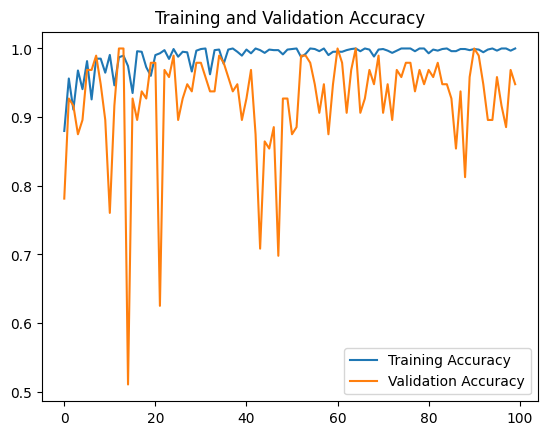

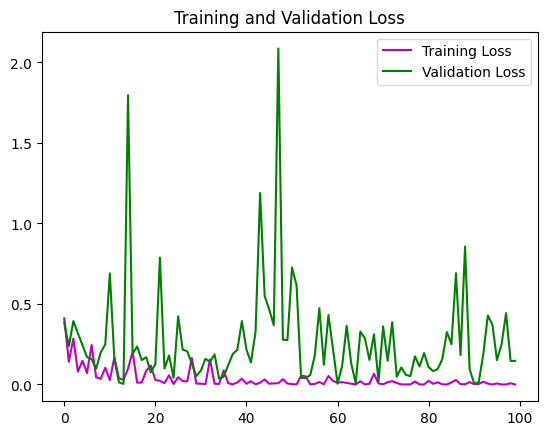

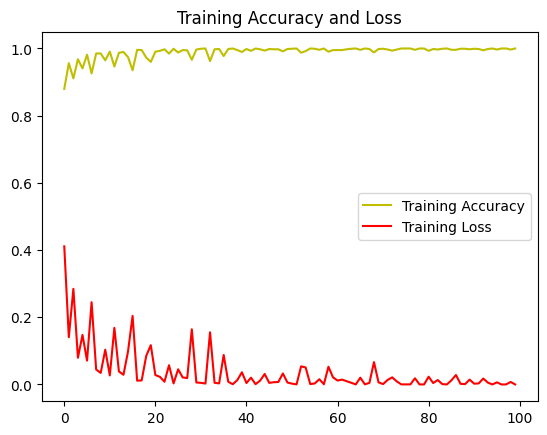

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the result
# Variable to get the result from the training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# set the epoch range
epoch_range = range(len(acc))

# Plot accuracy
#plt.figure(figsize=(10, 8))
#plt.subplot(131)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')
plt.figure()

# Plot loss
#plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss', color='m')
plt.plot(epoch_range, val_loss, label='Validation Loss', color='g')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.figure()

# Plot Training
#plt.subplot(1, 2, 3)
plt.plot(epoch_range, acc, label='Training Accuracy', color='y')
plt.plot(epoch_range, loss, label='Training Loss', color='r')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.figure()

plt.show()

## Evaluate The Model

Saving test_001.jpg to test_001 (2).jpg
1/1 [==============================] - 0s 36ms/step
test_001 (2).jpg
[[0. 0. 1.]]
Scissors


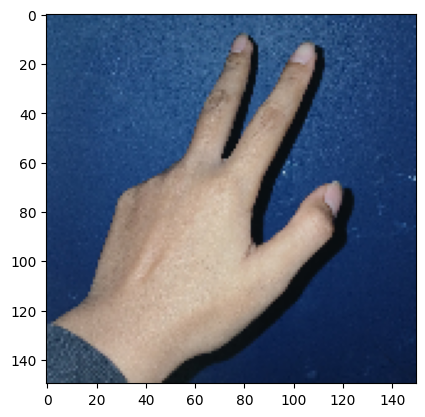

In [ ]:
# Evaluate using new images
# import libraries
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

# ensure the image will be displayed with graph
%matplotlib inline

# Upload images
uploaded = files.upload()

# Predict for all uploaded images
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

# Predict based on highest categorical score
    if classes[0, 0] != 0:
        print('Paper')
    elif classes[0, 1] != 0:
        print('Rock')
    else:
        print('Scissors')